# Data Understanding, Analysis, Visualization and Cleaning

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow import data as tf_da
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [ ]:
train_dir = "/content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/train"
test_dir = "/content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/test"

In [ ]:
# This is to check the number of images in the train folder using os, I am iterating through each class inside the train directory and printing the total number of images
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)#Adding the path of the class to the training directory
    if os.path.isdir(class_path):# checking if its a folder with images in it and not files
        num_images = len(os.listdir(class_path))#len helps us count the number of images
        print(f"Train - {class_folder}: {num_images} images")

Train - glioma_tumor: 720 images
Train - meningioma_tumor: 730 images
Train - normal: 350 images
Train - pituitary_tumor: 675 images


In [ ]:
# This is to check the number of images in the train folder using os, I am iterating through each class inside the train directory and printing the total number of images
for class_folder in os.listdir(test_dir):
    class_path = os.path.join(test_dir, class_folder)#Adding the path of the class to the training directory
    if os.path.isdir(class_path):# checking if its a folder with images in it and not files
        num_images = len(os.listdir(class_path))#len helps us count the number of images
        print(f"Test - {class_folder}: {num_images} images")

Test - glioma_tumor: 181 images
Test - meningioma_tumor: 183 images
Test - normal: 88 images
Test - pituitary_tumor: 169 images


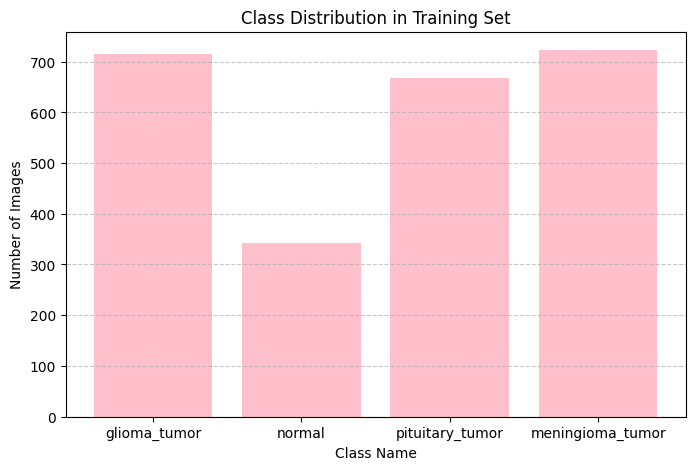

In [ ]:
class_names = []
image_counts = []

# Like above, we are looping through each folder
for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)
    if os.path.isdir(class_path):
        count = len([f for f in os.listdir(class_path)])
        class_names.append(class_folder)
        image_counts.append(count)

# Plotting
plt.figure(figsize=(8,5))
plt.bar(class_names, image_counts, color='pink')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class Name')
plt.ylabel('Number of Images')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The dataset is very imbalanced. For this, we will use normalization tecnhiques.

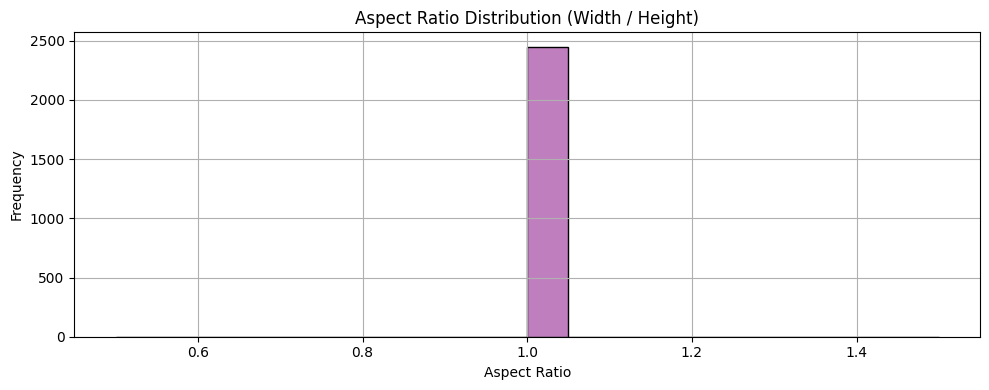

In [ ]:
import seaborn as sns
from PIL import Image

def get_image_sizes(data_dir):
    sizes = []
    for root, _, files in os.walk(data_dir):
        for file in files:
            if file.lower().endswith(('.jpg', '.png')):
                try:
                    img_path = os.path.join(root, file)
                    with Image.open(img_path) as img:
                        sizes.append(img.size)  # (width, height)
                except:
                    continue
    return sizes

image_sizes = get_image_sizes(train_dir)

aspect_ratios = [round(w / h, 2) for w, h in image_sizes if h != 0]

plt.figure(figsize=(10, 4))
sns.histplot(aspect_ratios, bins=20, kde=True, color='purple')
plt.title("Aspect Ratio Distribution (Width / Height)")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

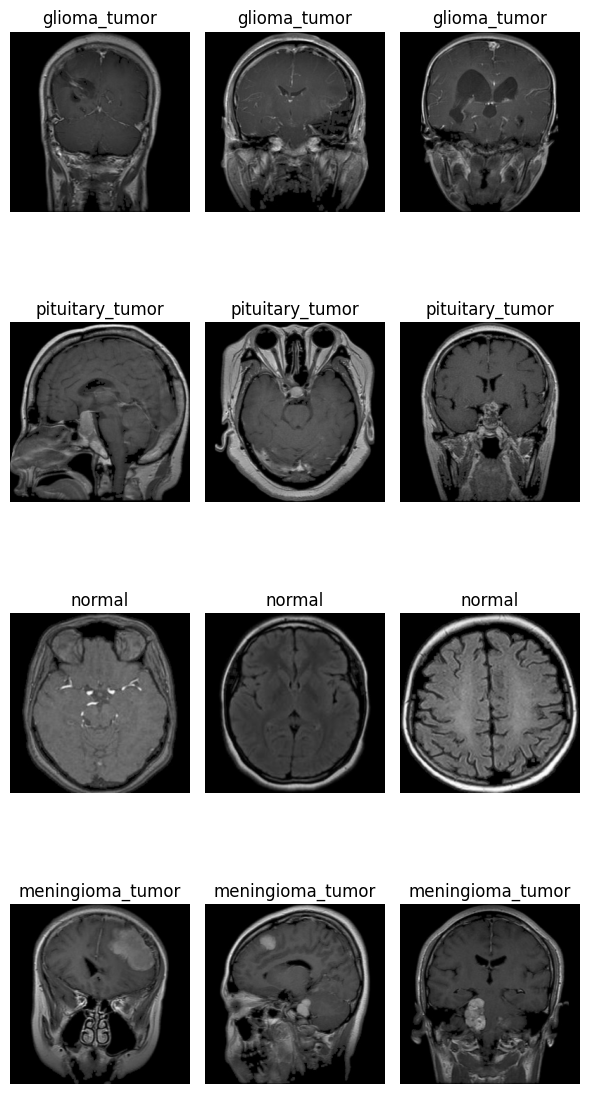

In [ ]:
def show_sample_images(data_dir, num_classes=5, images_per_class=3):
    class_names = [c for c in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, c))]
    selected_classes = random.sample(class_names, min(num_classes, len(class_names)))

    plt.figure(figsize=(6, 3 * num_classes))
    idx = 1

    for cls in selected_classes:
        class_path = os.path.join(data_dir, cls)
        images = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png'))]
        selected_images = random.sample(images, min(images_per_class, len(images)))

        for img_name in selected_images:
            img_path = os.path.join(class_path, img_name)
            img = Image.open(img_path)
            plt.subplot(num_classes, images_per_class, idx)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
            idx += 1

    plt.tight_layout()
    plt.show()

# Call the function using your train directory
show_sample_images(train_dir)

In [ ]:
from PIL import Image
corrupted_images = []

for class_folder in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_folder)

    if os.path.isdir(class_path):
        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            if image_file.lower().endswith(('.jpg', '.png')):
                try:
                    # Try opening and loading the image
                    with Image.open(image_path) as img:
                        img.verify()  # Check if image is broken
                except (IOError, SyntaxError) as e:
                    corrupted_images.append(image_path)
print(f"Total corrupted images in train folder: {len(corrupted_images)}")

Total corrupted images in train folder: 0


There were 28 corrupted images. This is the result after deleting them.

In [ ]:
from PIL import Image
import os

def delete_corrupted_images(folder_path):
    removed = 0
    for root, _, files in os.walk(folder_path):
        for file in files:
            file_path = os.path.join(root, file)
            try:
                img = Image.open(file_path)
                img.verify()  # Verify image file is not corrupted
            except Exception as e:
                print(f"Corrupted image deleted: {file_path}")
                os.remove(file_path)
                removed += 1
    print(f"✅ Done. Removed {removed} corrupted images.")


In [ ]:
# Replace with the actual paths to your dataset folders
delete_corrupted_images("/content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/train")
delete_corrupted_images("/content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/test")


Corrupted image deleted: /content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/train/glioma_tumor/G_107.jpg
Corrupted image deleted: /content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/train/glioma_tumor/G_2.jpg
Corrupted image deleted: /content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/train/glioma_tumor/G_406.jpg
Corrupted image deleted: /content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/train/glioma_tumor/G_560.jpg
Corrupted image deleted: /content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/train/glioma_tumor/G_737.jpg
Corrupted image deleted: /content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/train/glioma_tumor/G_744.jpg
Corrupted image deleted: /content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/train/glioma_tumor/G_839.jpg
Corrupted image deleted: /content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation

Normalization

In [ ]:
image_size = (256, 256)
batch_size = 32

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/AI-Assessment/BrainTumorClassifcation/BrainTumorClassifcation/train",
    validation_split=0.2,
    subset="both",
    seed=123,
    image_size=image_size,
    batch_size=batch_size,
)

Found 2448 files belonging to 4 classes.
Using 1959 files for training.
Using 489 files for validation.


In [ ]:
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(tf.cast(y, tf.int32), depth=4)))
val_ds   = val_ds.map(lambda x, y: (x, tf.one_hot(tf.cast(y, tf.int32),   depth=4)))

In [ ]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomTranslation(0.1,0.1),
    layers.RandomContrast(0.1)
]

def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

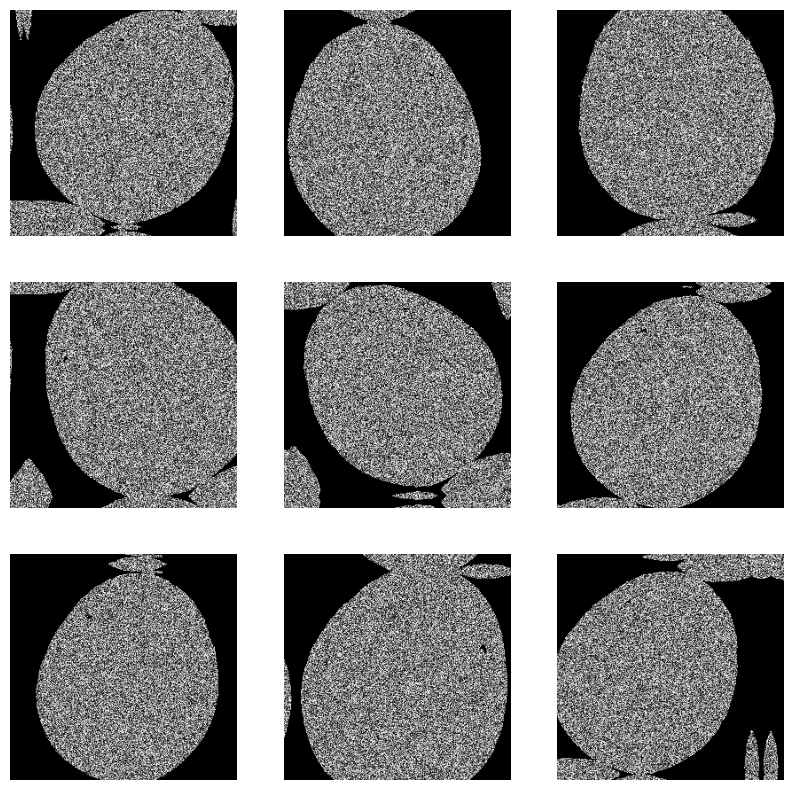

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow((augmented_images[0].numpy() * 255).astype("uint8"))
        plt.axis("off")

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Labels as integers: 0, 1, 2, 3 for each class
labels = np.array([0]*723 + [1]*714 + [2]*668 + [3]*343)

# Compute weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(labels),
    y=labels
)

# Convert to dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print(class_weights_dict)

{0: np.float64(0.8464730290456431), 1: np.float64(0.8571428571428571), 2: np.float64(0.9161676646706587), 3: np.float64(1.784256559766764)}


# Design, Train, and Evaluate a Baseline Model

In [ ]:
from tensorflow.keras import regularizers

def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    x = inputs

    # --- Convolutional + Pooling Layers ---
    x = layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # Flatten before FC layers
    x = layers.Flatten()(x)

    # --- Fully Connected Layers ---
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.3)(x)

    x = layers.Dense(64, activation='relu')(x)

    # --- Output Layer ---
    if num_classes == 2:
        outputs = layers.Dense(1, activation='sigmoid')(x)  # Binary classification
    else:
        outputs = layers.Dense(num_classes, activation='softmax')(x)  # Multiclass

    return keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
model = make_model(input_shape=(256, 256, 3), num_classes=4)

In [ ]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,689,348 (128.51 MB)

 Trainable params: 33,689,348 (128.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import time

epochs = 15

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
    EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")],
)
start_time = time.time()
history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)
end_time = time.time()
print("Total training time for baseline model (seconds):", end_time - start_time)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/nn.py:666: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - acc: 0.2730 - loss: 13.0066 - val_acc: 0.4458 - val_loss: 1.1970
Epoch 2/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 183ms/step - acc: 0.4794 - loss: 1.1895 - val_acc: 0.5501 - val_loss: 1.0300
Epoch 3/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - acc: 0.5649 - loss: 1.0100 - val_acc: 0.6462 - val_loss: 0.8657
Epoch 4/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 178ms/step - acc: 0.6332 - loss: 0.8744 - val_acc: 0.6933 - val_loss: 0.7405
Epoch 5/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 213ms/step - acc: 0.7233 - loss: 0.7122 - val_acc: 0.7219 - val_loss: 0.6929
Epoch 6/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - acc: 0.7602 - loss: 0.6437 - val_acc: 0.7566 - val_loss: 0.6561
Epoch 7/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 227ms/step - acc: 0.8051 - loss: 0.5078 - val_acc: 0.7628 - val_loss: 0.6026
Epoch 8/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 295ms/step - acc: 0.8597 - loss: 0.4027 - val_acc: 0.7771 - val_loss: 0.5914
Epoch 9/15
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - acc

In [ ]:
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - acc: 0.7846 - loss: 0.5896
Validation Loss: 0.5346004962921143
Validation Accuracy: 0.7934560179710388


In [ ]:
original_ds = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/AI-Assessment/BrainTumorClassifcation/BrainTumorClassifcation/train")
class_names = original_ds.class_names
print(class_names)

Found 2448 files belonging to 4 classes.
['glioma_tumor', 'meningioma_tumor', 'normal', 'pituitary_tumor']


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_true = []
y_pred = []

for images, labels in val_ds:
    preds = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.79      0.80      0.79       147
meningioma_tumor       0.73      0.69      0.71       143
          normal       0.78      0.93      0.85        73
 pituitary_tumor       0.88      0.83      0.86       126

        accuracy                           0.79       489
       macro avg       0.80      0.81  

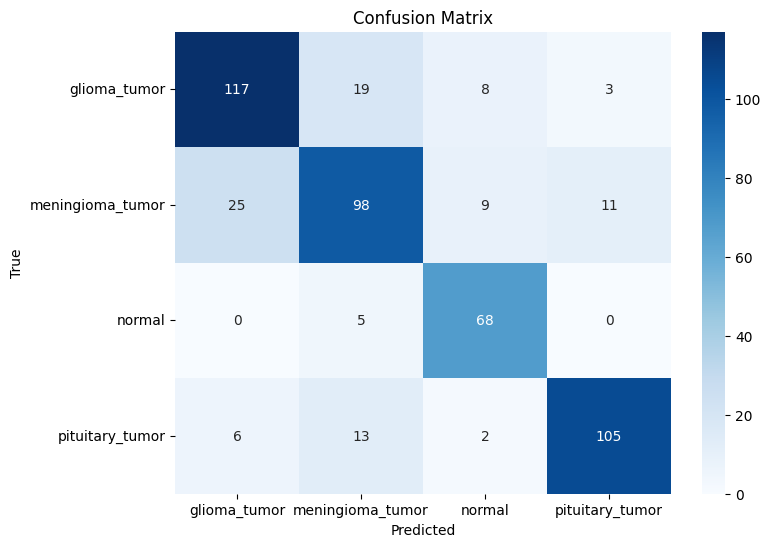

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

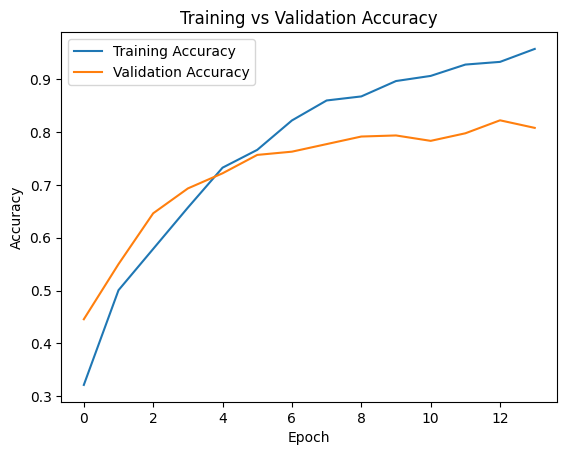

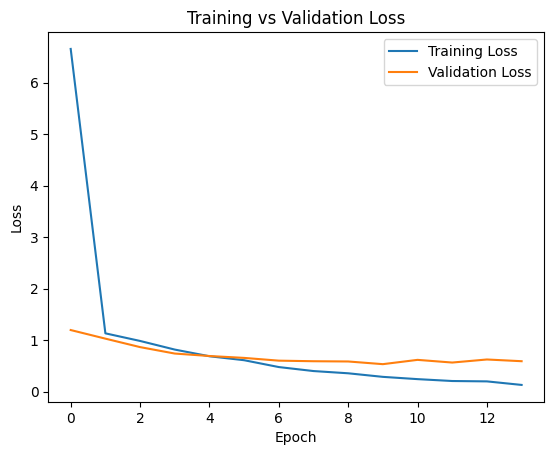

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()

In [ ]:
import numpy as np

# Extract images and labels from the validation dataset
x_val = np.concatenate([images.numpy() for images, labels in val_ds], axis=0)
y_val = np.concatenate([labels.numpy() for images, labels in val_ds], axis=0)

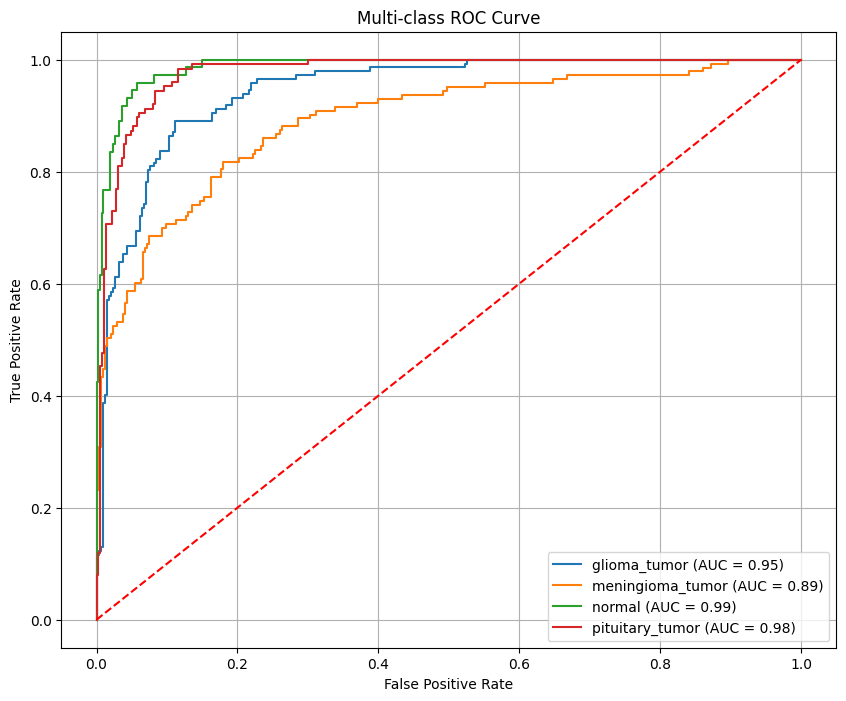

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Assume you have n classes (e.g., 4)
n_classes = 4

# Binarize labels (needed for multi-class ROC)
y_val_binarized = label_binarize(y_val, classes=list(range(n_classes)))

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class with real names
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"{class_names[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'r--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
import keras
from keras import ops

model.save("baseline_model.h5")

# Deeper Learning

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, regularizers, models

def make_deeper_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    regularizer = regularizers.l2(1e-3)
    x = inputs

    # --- Deeper Convolutional Layers with Regularization ---
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer)(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer)(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer)(x)
    x = layers.MaxPooling2D((2, 2))(x)

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu', kernel_regularizer=regularizer)(x)
    x = layers.MaxPooling2D((2, 2))(x)

    # --- Fully Connected Layers ---
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)

    # --- Light Dense Head ---
    x = layers.Dense(128, activation='relu', kernel_regularizer=regularizer)(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(64, activation='relu', kernel_regularizer=regularizer)(x)

    # --- Output Layer ---
    if num_classes == 2:
        outputs = layers.Dense(1, activation='sigmoid')(x)
    else:
        outputs = layers.Dense(num_classes, activation='softmax')(x)

    return keras.Model(inputs=inputs, outputs=outputs)


In [ ]:
deeper_model = make_deeper_model(input_shape=(256, 256, 3), num_classes=4)

In [ ]:
deeper_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 256, 256, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 256, 256, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 128, 128, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 64, 64, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 32, 32, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 1,215,588 (4.64 MB)

 Trainable params: 1,214,628 (4.63 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',       # Monitor validation loss
    factor=0.2,               # Reduce learning rate by a factor of 0.2 (you can adjust this value)
    patience=5,               # Wait for 5 epochs without improvement before reducing LR
    verbose=1,                # Print a message when the learning rate is reduced
    min_lr=1e-6               # Set a lower bound for the learning rate to prevent it from becoming too small
)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import time

epochs = 60

callbacks = [
    ModelCheckpoint("deeper_save_at_{epoch}.keras", save_best_only=True),
    EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
    reduce_lr
]

In [ ]:
adam_model= make_deeper_model(input_shape=(256, 256, 3), num_classes=4)

adam_model.compile(
    optimizer=keras.optimizers.Adam(5e-5),
    loss='categorical_crossentropy',
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")]
)

start_time = time.time()
history_adam = adam_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks
)
end_time = time.time()
print("Total training time for adam model (seconds):", end_time - start_time)

Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 33s 342ms/step - acc: 0.3065 - loss: 2.6726 - val_acc: 0.3517 - val_loss: 2.3906 - learning_rate: 5.0000e-05
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 215ms/step - acc: 0.4413 - loss: 2.3386 - val_acc: 0.3865 - val_loss: 2.3185 - learning_rate: 5.0000e-05
Epoch 3/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 218ms/step - acc: 0.4596 - loss: 2.2790 - val_acc: 0.4417 - val_loss: 2.2034 - learning_rate: 5.0000e-05
Epoch 4/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 219ms/step - acc: 0.4820 - loss: 2.1931 - val_acc: 0.4765 - val_loss: 2.1116 - learning_rate: 5.0000e-05
Epoch 5/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 196ms/step - acc: 0.5119 - loss: 2.1254 - val_acc: 0.4663 - val_loss: 2.1572 - learning_rate: 5.0000e-05
Epoch 6/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - acc: 0.5451 - loss: 2.0474 - val_acc: 0.5378 - val_loss: 2.0661 - learning_rate: 5.0000e-05
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - acc: 0.5702 - loss: 2.0150 - val_acc: 0.5706 - val_loss: 1.9295

In [ ]:
loss, accuracy = adam_model.evaluate(val_ds)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - acc: 0.7214 - loss: 1.6562
Validation Loss: 1.672479510307312
Validation Accuracy: 0.7116564512252808


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_true_adam = []
y_pred_adam = []

for images, labels in val_ds:
    preds = adam_model.predict(images)
    y_true_adam.extend(np.argmax(labels, axis=1))
    y_pred_adam.extend(np.argmax(preds, axis=1))

print(classification_report(y_true_adam, y_pred_adam, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.96      0.59      0.73       147
meningioma_tumor       0.57      0.64      0.61       143
          normal       0.71      0.78      0.75        73
 pituitary_tumor       0.72      0.90      0.80       126

        accuracy                           0.71       489
       macro avg       0.74  

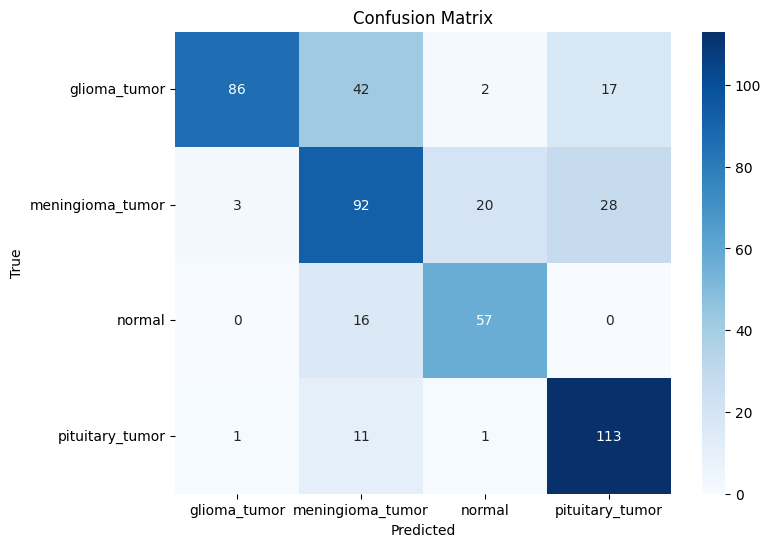

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true_adam, y_pred_adam)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

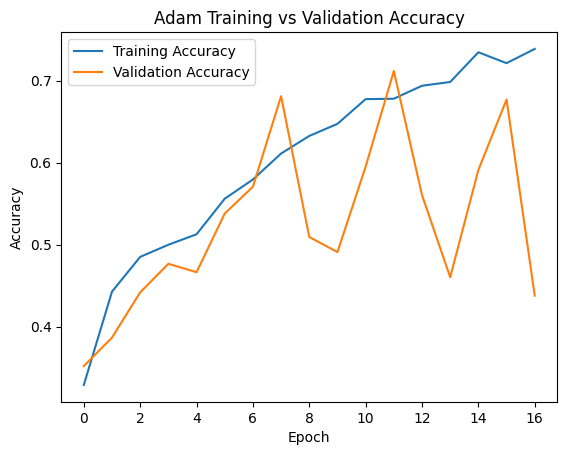

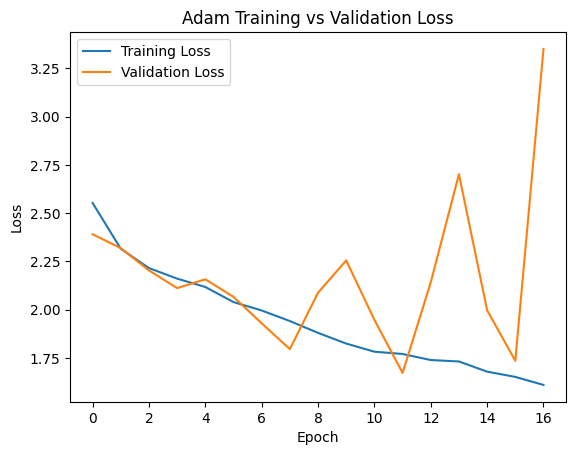

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_adam.history['acc'], label='Training Accuracy')
plt.plot(history_adam.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Adam Training vs Validation Accuracy')
plt.show()

plt.plot(history_adam.history['loss'], label='Training Loss')
plt.plot(history_adam.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Adam Training vs Validation Loss')
plt.show()

In [ ]:
# Predict class probabilities
y_pred_prob_adam = adam_model.predict(x_val)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


In [ ]:
from sklearn.preprocessing import label_binarize

n_classes = 4
y_val_binarized = label_binarize(y_val, classes=range(n_classes))

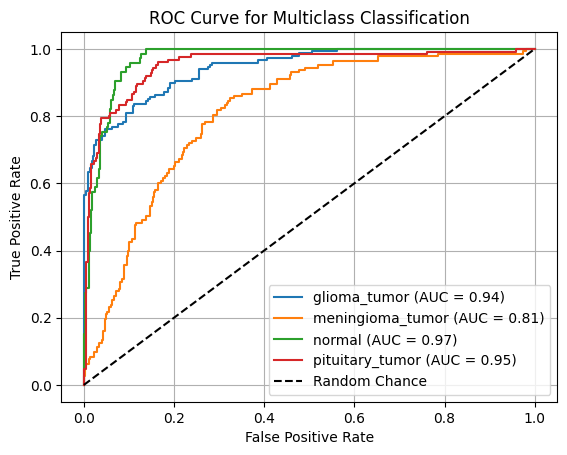

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val_binarized[:, i], y_pred_prob_adam[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{class_names [i]} (AUC = {roc_auc:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Configure plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
adam_model.save("adam_model.h5")

In [ ]:
sgd_model= make_deeper_model(input_shape=(256, 256, 3), num_classes=4)

sgd_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=5e-5, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=[keras.metrics.CategoricalAccuracy(name="acc")]
)

start_time = time.time()
history_sgd = sgd_model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=callbacks
)
end_time = time.time()
print("Total training time for sgd model (seconds):", end_time - start_time)

Epoch 1/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 27s 328ms/step - acc: 0.2013 - loss: 3.2920 - val_acc: 0.2781 - val_loss: 2.4292 - learning_rate: 5.0000e-05
Epoch 2/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 210ms/step - acc: 0.2394 - loss: 2.7518 - val_acc: 0.2843 - val_loss: 2.4230 - learning_rate: 5.0000e-05
Epoch 3/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 19s 193ms/step - acc: 0.2561 - loss: 2.6277 - val_acc: 0.2904 - val_loss: 2.4092 - learning_rate: 5.0000e-05
Epoch 4/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 12s 195ms/step - acc: 0.2600 - loss: 2.5377 - val_acc: 0.3006 - val_loss: 2.3971 - learning_rate: 5.0000e-05
Epoch 5/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 21s 200ms/step - acc: 0.2923 - loss: 2.5545 - val_acc: 0.3129 - val_loss: 2.3853 - learning_rate: 5.0000e-05
Epoch 6/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 196ms/step - acc: 0.3030 - loss: 2.5026 - val_acc: 0.3599 - val_loss: 2.3708 - learning_rate: 5.0000e-05
Epoch 7/60
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - acc: 0.2930 - loss: 2.4929 - val_acc: 0.3967 - val_loss: 2.3545

In [ ]:
y_true_sgd = []
y_pred_sgd = []

for images, labels in val_ds:
    preds = sgd_model.predict(images)
    y_true_sgd.extend(np.argmax(labels, axis=1))
    y_pred_sgd.extend(np.argmax(preds, axis=1))

print(classification_report(y_true_sgd, y_pred_sgd, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 875ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 582ms/step
                  precision    recall  f1-score   support

    glioma_tumor       0.55      0.69      0.61       147
meningioma_tumor       0.40      0.45      0.42       143
          normal       1.00      0.01      0.03        73
 pituitary_tumor       0.64      0.73      0.68       126

        accuracy                           0.53       489
       macro avg       0.65   

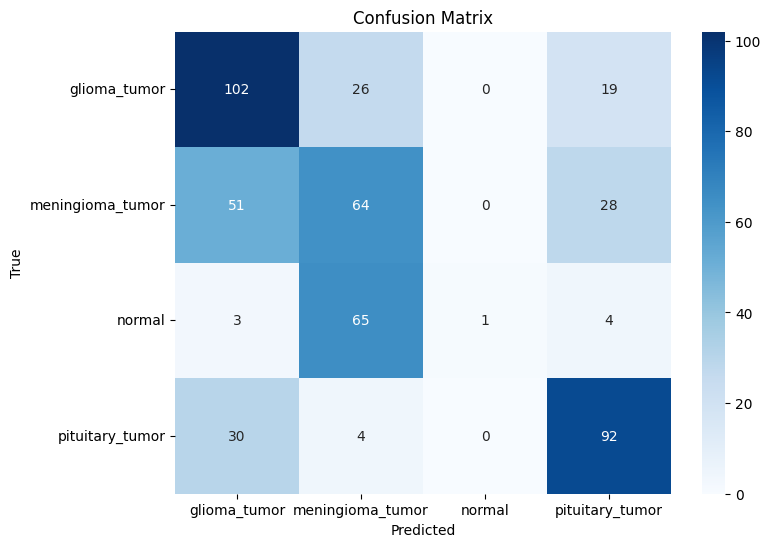

In [ ]:
cm = confusion_matrix(y_true_sgd, y_pred_sgd)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

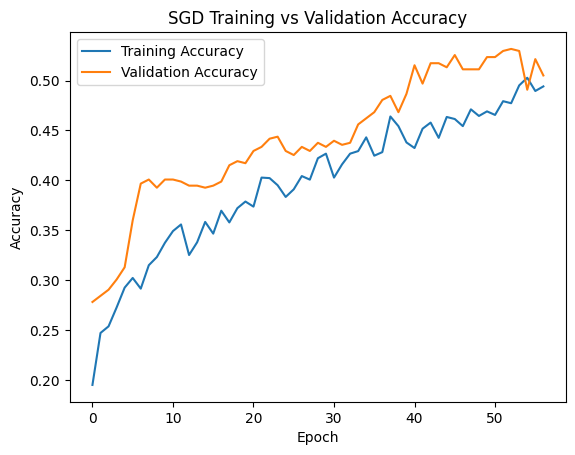

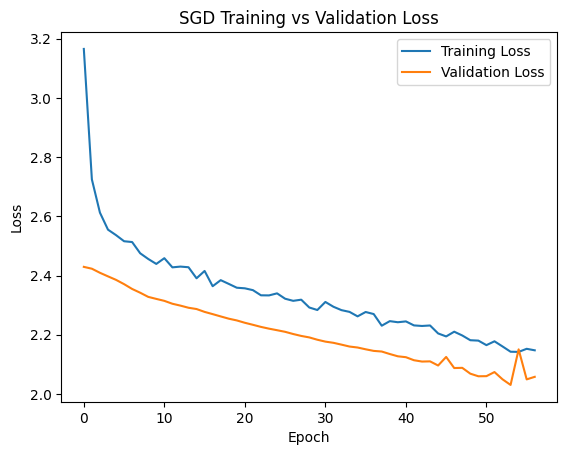

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_sgd.history['acc'], label='Training Accuracy')
plt.plot(history_sgd.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('SGD Training vs Validation Accuracy')
plt.show()

plt.plot(history_sgd.history['loss'], label='Training Loss')
plt.plot(history_sgd.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('SGD Training vs Validation Loss')
plt.show()

In [ ]:
y_pred_prob_sgd = sgd_model.predict(x_val)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


In [ ]:
from sklearn.preprocessing import label_binarize

n_classes = 4
y_val_binarized_sgd = label_binarize(y_val, classes=range(n_classes))

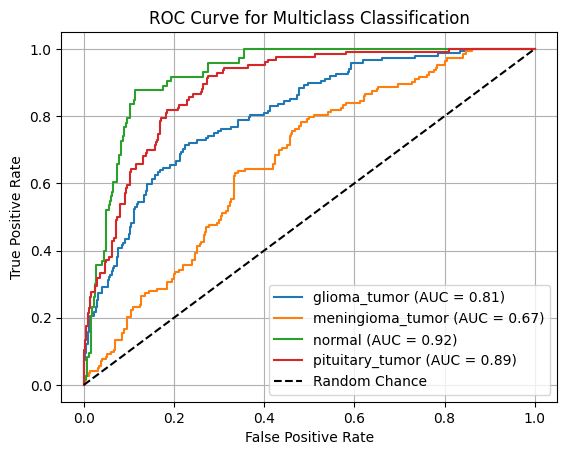

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Plot ROC curve for each class
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_val_binarized_sgd[:, i], y_pred_prob_sgd[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'{class_names [i]} (AUC = {roc_auc:.2f})')

# Plot the random chance line
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')

# Configure plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
sgd_model.save("sgd_model.h5")

Transfer learning


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [3]:
# Update these paths as per your project structure
train_dir = "/content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/train"

img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

In [4]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 1960 images belonging to 4 classes.
Found 487 images belonging to 4 classes.


In [5]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze all base layers

# Add custom classification head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 20,090,564 (76.64 MB)

 Trainable params: 66,180 (258.52 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [6]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',       # Monitor validation loss
    factor=0.2,               # Reduce learning rate by a factor of 0.2 (you can adjust this value)
    patience=5,               # Wait for 5 epochs without improvement before reducing LR
    verbose=1,                # Print a message when the learning rate is reduced
    min_lr=1e-6               # Set a lower bound for the learning rate to prevent it from becoming too small
)

In [7]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 436s 7s/step - accuracy: 0.2283 - loss: 1.6969 - val_accuracy: 0.1910 - val_loss: 1.3698
Epoch 2/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 627ms/step - accuracy: 0.3120 - loss: 1.4711 - val_accuracy: 0.2752 - val_loss: 1.3491
Epoch 3/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 632ms/step - accuracy: 0.3250 - loss: 1.3926 - val_accuracy: 0.3018 - val_loss: 1.3281
Epoch 4/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 661ms/step - accuracy: 0.3076 - loss: 1.3823 - val_accuracy: 0.4148 - val_loss: 1.3045
Epoch 5/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 628ms/step - accuracy: 0.3361 - loss: 1.3382 - val_accuracy: 0.4374 - val_loss: 1.2844
Epoch 6/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 40s 645ms/step - accuracy: 0.3745 - loss: 1.2986 - val_accuracy: 0.3778 - val_loss: 1.2698
Epoch 7/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 629ms/step - accuracy: 0.4030 - loss: 1.2805 - val_accuracy: 0.4312 - val_loss: 1.2486
Epoch 8/10
62/62 ━━━━━━━━━━━━━━━━━━━━ 39s 630ms/step - accuracy: 0.4239 - loss: 1.2660 - val_accura

In [8]:
# Unfreeze more layers for deeper fine-tuning
for layer in base_model.layers[-8:]:
    layer.trainable = True

# Compile with a lower learning rate and optional label smoothing
from tensorflow.keras.losses import CategoricalCrossentropy
loss_fn = CategoricalCrossentropy(label_smoothing=0.1)

model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss=loss_fn,
    metrics=['accuracy']
)

# Fine-tune with EarlyStopping and ReduceLROnPlateau
fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=12,  # Slightly increased
    callbacks=[early_stop, reduce_lr],  # restore_best_weights already set in early_stop
    verbose=1
)


Epoch 1/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 61s 771ms/step - accuracy: 0.4712 - loss: 1.1914 - val_accuracy: 0.7125 - val_loss: 0.9421 - learning_rate: 1.0000e-05
Epoch 2/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 42s 673ms/step - accuracy: 0.7011 - loss: 0.9232 - val_accuracy: 0.7906 - val_loss: 0.7609 - learning_rate: 1.0000e-05
Epoch 3/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 659ms/step - accuracy: 0.7680 - loss: 0.7938 - val_accuracy: 0.8275 - val_loss: 0.7013 - learning_rate: 1.0000e-05
Epoch 4/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 655ms/step - accuracy: 0.8225 - loss: 0.7124 - val_accuracy: 0.8357 - val_loss: 0.6641 - learning_rate: 1.0000e-05
Epoch 5/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 655ms/step - accuracy: 0.8410 - loss: 0.6812 - val_accuracy: 0.8522 - val_loss: 0.6394 - learning_rate: 1.0000e-05
Epoch 6/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 41s 654ms/step - accuracy: 0.8771 - loss: 0.6397 - val_accuracy: 0.8439 - val_loss: 0.6787 - learning_rate: 1.0000e-05
Epoch 7/12
62/62 ━━━━━━━━━━━━━━━━━━━━ 44s 706ms/step - acc

In [13]:
# HDF5 format
model.save('/content/drive/MyDrive/vgg19_finetuned_brain_tumor.h5')


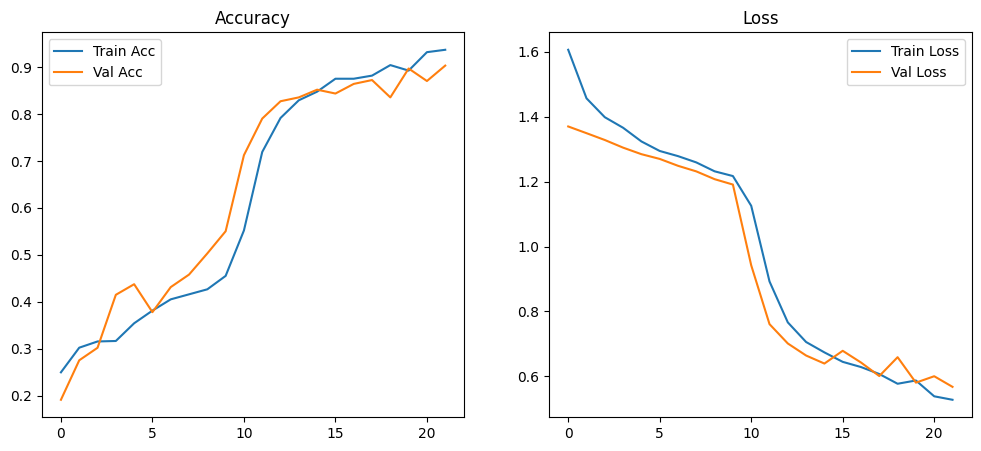

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'] + fine_tune_history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'] + fine_tune_history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'] + fine_tune_history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + fine_tune_history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.show()


In [10]:
Y_pred = model.predict(val_generator)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

# Print classification report
print("Classification Report (VGG19 Transfer Learning):")
print(classification_report(y_true, y_pred, target_names=class_labels, digits=4))


16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 529ms/step
Classification Report (VGG19 Transfer Learning):
                  precision    recall  f1-score   support

    glioma_tumor     0.9143    0.9014    0.9078       142
meningioma_tumor     0.9355    0.8056    0.8657       144
          normal     0.8000    1.0000    0.8889        68
 pituitary_tumor     0.9275    0.9624    0.9446       133

        accuracy                         0.9035       487
       macro avg     0.8943    0.9173    0.9018       487
    weighted avg     0.9082    0.9035    0.9028       487



1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


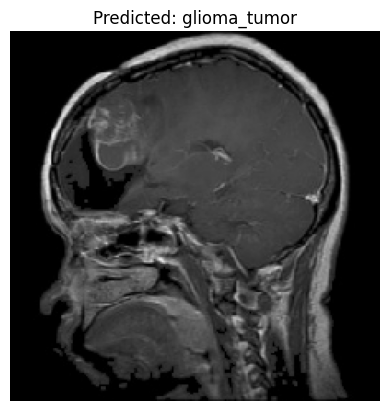

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


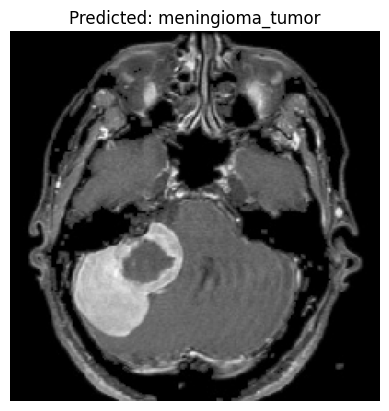

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


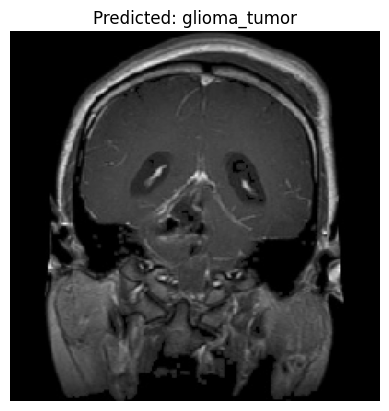

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


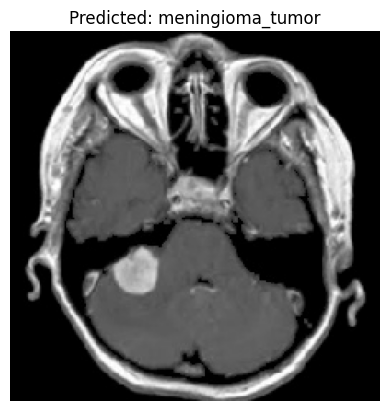

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


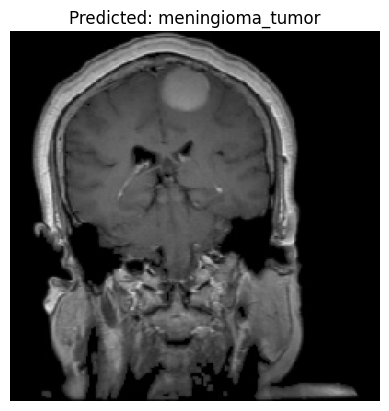

In [11]:
for i in range(5):
    idx = random.randint(0, len(val_generator.filenames) - 1)
    img_path = os.path.join(train_dir, val_generator.filenames[idx])
    img = tf.keras.utils.load_img(img_path, target_size=(224, 224))
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    pred = model.predict(img_array)
    class_idx = np.argmax(pred[0])
    label = class_labels[class_idx]

    plt.imshow(img)
    plt.title(f"Predicted: {label}")
    plt.axis('off')
    plt.show()


In [16]:
#Sample prediction
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/vgg19_finetuned_brain_tumor.h5')


In [17]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np

img_path = '/content/drive/MyDrive/Brain Tumor Classifcation/Brain Tumor Classifcation/test/meningioma_tumor/M_107.jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
class_idx = np.argmax(pred[0])

# Use your class labels from your training generator
class_labels = list(train_generator.class_indices.keys())
print("Predicted class:", class_labels[class_idx])


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step
Predicted class: meningioma_tumor
